In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

In [100]:
test_data = pd.read_parquet('data/test.parquet')
train_data = pd.read_parquet('data/train.parquet')

events_data = pd.read_parquet('data/events.parquet')

In [101]:
train_data

,client_id,order_timestamp,order_id,line_items,refunded
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0
...,...,...,...,...,...
396,1741768040-4FndHgyUB_Ez,2025-03-12 15:46:44,542d2617e82ea4534ad125e504d7905bdd2a148910b900...,"[{""item_id"":14067946848290,""price"":1249,""quant...",1
397,1737698437-nxVsCpCyGfTQ,2025-03-06 23:54:58,4464ef7702b923cd4f0a5c44b5e7b32811873f5ca14b1c...,"[{""item_id"":14056829616162,""price"":1249,""quant...",1
398,1742586777-hKs5Ex6RxVWh,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,"[{""item_id"":14087764017186,""price"":1899,""quant...",1
399,1741556576-xRJSuNe1ntOr,2025-03-09 22:20:07,0ac85b4236e641ad39400995abfc96dc0677d31a55923e...,"[{""item_id"":14062519812130,""price"":2449,""quant...",1


In [102]:
events_data

,client_id,event_name,event_id,event_timestamp,event_data,page_url,user_agent
0,1742586777-hKs5Ex6RxVWh,clicked,e0d95d0c-496e-4b48-9b19-dc5d7895d51c,2025-03-21 20:27:35.515,"{""element_identifier"":""delivery_last_name""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
1,1742586777-hKs5Ex6RxVWh,clicked,8594ca89-0a65-4d4c-b6a0-f82bbc6a35ba,2025-03-21 20:27:39.107,"{""element_identifier"":""delivery_address1""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
2,1742586777-hKs5Ex6RxVWh,clicked,0cb82d4a-b19e-4a28-af77-f48f9bd03e78,2025-03-21 20:27:30.545,"{""element_identifier"":""delivery_first_name""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
3,1742586777-hKs5Ex6RxVWh,clicked,025bd2f6-5b1e-46d5-9348-090098da8775,2025-03-21 20:27:22.659,"{""element_identifier"":""delivery_country_code""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
4,1742586777-hKs5Ex6RxVWh,clicked,70784d23-2485-43b4-8d0e-221d129e3f11,2025-03-21 20:27:12.000,"{""element_identifier"":""contact_email""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
...,...,...,...,...,...,...,...
58114,1740096153-eHlMeFvP_qui,clicked,b68f9072-8807-4f29-885f-1a767bd26f03,2025-03-02 14:12:54.625,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
58115,1740885779-2ruDGzJ-lQrj,clicked,a06a4217-26b0-4d5b-ad15-be05aecd892a,2025-03-02 03:30:12.394,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
58116,1740885779-2ruDGzJ-lQrj,clicked,7166f546-a603-4726-ae96-24da4b9ed8fd,2025-03-02 03:30:13.573,"{""element_identifier"":""add_to_cart_btn""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
58117,1740096153-eHlMeFvP_qui,clicked,7f2a2e09-e044-444b-bffa-b89797533abc,2025-03-02 09:09:55.763,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [103]:
train_data.isnull().sum()

client_id          0
order_timestamp    0
order_id           0
line_items         0
refunded           0
dtype: int64

In [104]:
test_data.isnull().sum()

client_id          0
order_timestamp    0
order_id           0
line_items         0
dtype: int64

In [105]:
events_data.isnull().sum()

client_id          0
event_name         0
event_id           0
event_timestamp    0
event_data         0
page_url           0
user_agent         0
dtype: int64

In [106]:
# Merge train_data, test_data, and events_data on 'client_id'
#merged_df = pd.merge(train_data, test_data, on='client_id', how='outer', suffixes=('_train', '_test'))
# merged_df = pd.merge(train_data, events_data, on=['client_id','order_timestamp'], how='outer')
# len(merged_df)

In [107]:
num_refunds = train_data.groupby('client_id')['refunded'].sum()
num_refunds = num_refunds.reset_index().sort_values(by='refunded', ascending=False)
num_refunds

,client_id,refunded
331,1742355193-bAE0dtwAeQcg,2
199,1741538805-UnxPiFyyX5hq,1
299,1742159699-QEaQGzuuX6j-,1
122,1741058251-A80U1Ls14lwm,1
123,1741058755-M3qZgXQdSE4e,1
...,...,...
152,1741234516-oOo4pOL9dHh_,0
151,1741232617-irnfwByZQ3Tp,0
150,1741231417-N-UajfWEOh3y,0
149,1741228930-suvZayBKZIRW,0


In [108]:
events_data['event_name'].value_counts().head(10)

event_name
clicked                      35819
page_viewed                  13215
size_changed                  4379
checkout_started              2446
product_added_to_cart         1394
checkout_completed             554
product_removed_from_cart      312
Name: count, dtype: int64

array([[<Axes: title={'center': 'order_timestamp'}>,
        <Axes: title={'center': 'refunded'}>]], dtype=object)

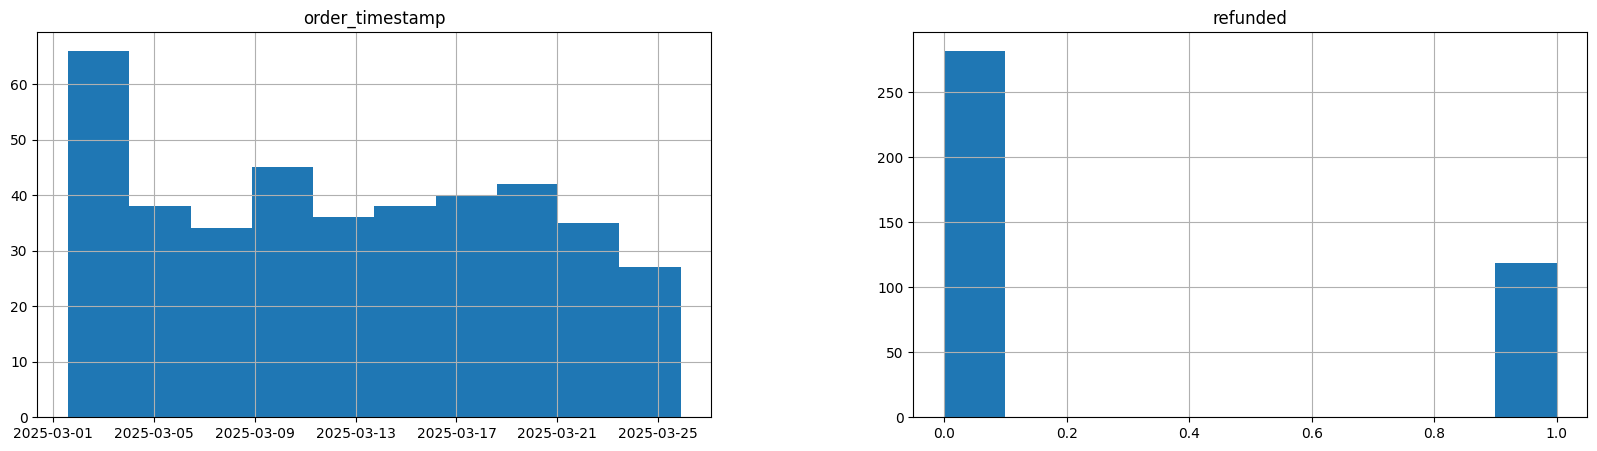

In [109]:
train_data.hist(figsize=(20, 5))

array([[<Axes: title={'center': 'event_timestamp'}>]], dtype=object)

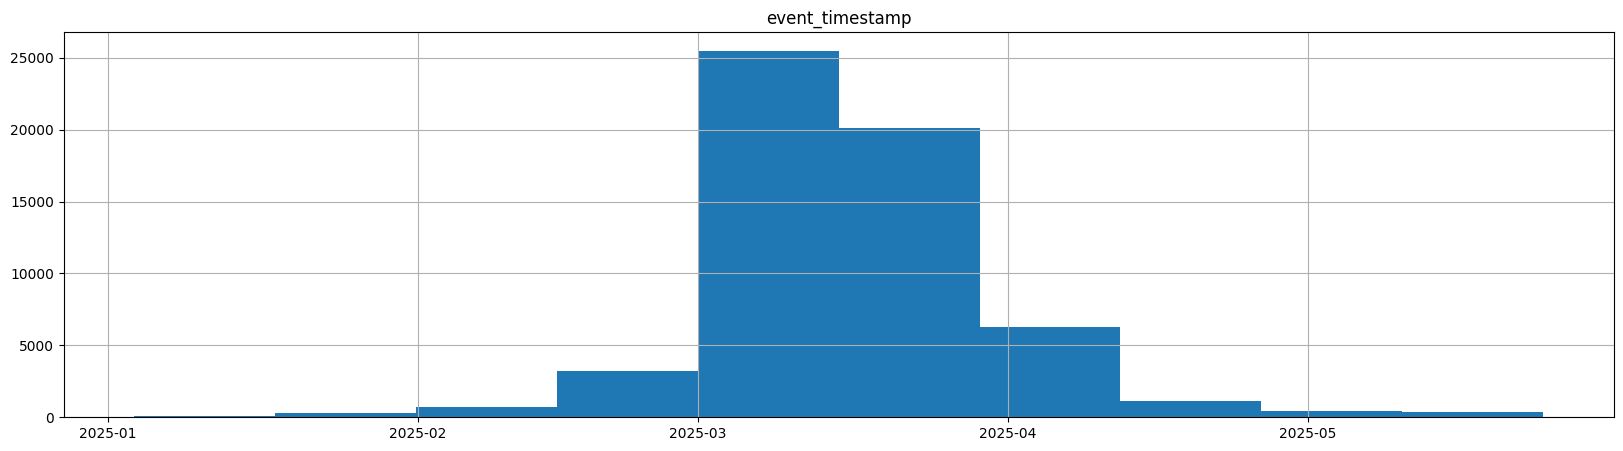

In [110]:
events_data.hist(figsize=(20, 5))

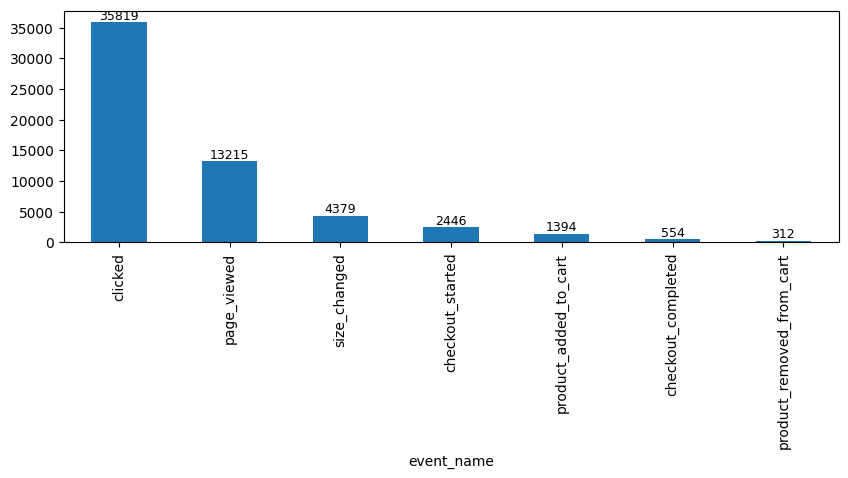

In [111]:
ax = events_data['event_name'].value_counts().plot(kind='bar', figsize=(10, 3))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

In [112]:
# Convert timestamps from milliseconds to datetime
train_data['order_datetime'] = pd.to_datetime(train_data['order_timestamp'], unit='ms')
test_data['order_datetime'] = pd.to_datetime(test_data['order_timestamp'], unit='ms')
events_data['event_datetime'] = pd.to_datetime(events_data['event_timestamp'], unit='ms')

In [113]:
events_df = events_data
train_df = train_data
test_df = test_data
len(train_df)

401

## need to convert the line_items field (currently a JSON string) into usable features like:

total_quantity

total_price

avg_price_per_item

unique_items_count

In [114]:
import ast

def extract_line_item_features(df):
    # Parse line_items column safely
    df["parsed_items"] = df["line_items"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

    # Compute features
    df["total_quantity"] = df["parsed_items"].apply(lambda items: sum(i["quantity"] for i in items))
    df["total_price_cents"] = df["parsed_items"].apply(lambda items: sum(i["price"] * i["quantity"] for i in items))
    df["unique_items_count"] = df["parsed_items"].apply(lambda items: len(set(i["item_id"] for i in items)))
    df["avg_price_per_item"] = df["total_price_cents"] / df["total_quantity"]
    
    return df.drop(columns=["parsed_items"])

# Apply to both train and test
train_df = extract_line_item_features(train_df)
test_df = extract_line_item_features(test_df)

In [115]:
train_df

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0,2025-03-02 20:59:53,1,1349.0,1,1349.0
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0,2025-03-16 01:34:30,1,1249.0,1,1249.0
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0,2025-03-18 23:24:48,1,1599.0,1,1599.0
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0,2025-03-10 00:48:15,1,1249.0,1,1249.0
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0,2025-03-22 02:42:08,1,1599.0,1,1599.0
...,...,...,...,...,...,...,...,...,...,...
396,1741768040-4FndHgyUB_Ez,2025-03-12 15:46:44,542d2617e82ea4534ad125e504d7905bdd2a148910b900...,"[{""item_id"":14067946848290,""price"":1249,""quant...",1,2025-03-12 15:46:44,1,1249.0,1,1249.0
397,1737698437-nxVsCpCyGfTQ,2025-03-06 23:54:58,4464ef7702b923cd4f0a5c44b5e7b32811873f5ca14b1c...,"[{""item_id"":14056829616162,""price"":1249,""quant...",1,2025-03-06 23:54:58,1,1249.0,1,1249.0
398,1742586777-hKs5Ex6RxVWh,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,"[{""item_id"":14087764017186,""price"":1899,""quant...",1,2025-03-21 20:46:06,1,1899.0,1,1899.0
399,1741556576-xRJSuNe1ntOr,2025-03-09 22:20:07,0ac85b4236e641ad39400995abfc96dc0677d31a55923e...,"[{""item_id"":14062519812130,""price"":2449,""quant...",1,2025-03-09 22:20:07,1,2449.0,1,2449.0


## Time-Based Features from order_timestamp lik e:
is weekend

order weekday (0-6)

order hour

In [116]:
train_df["order_timestamp"] = pd.to_datetime(train_df["order_timestamp"])
test_df["order_timestamp"] = pd.to_datetime(test_df["order_timestamp"])

for df in [train_df, test_df]:
    df["order_hour"] = df["order_timestamp"].dt.hour
    df["order_weekday"] = df["order_timestamp"].dt.weekday
    df["is_weekend"] = df["order_weekday"].isin([5, 6]).astype(int)
    df['order_month'] = df['order_timestamp'].dt.month


## user features like: 
has_checkout_completed

has checkout_sytarted

has_add_to_cart


## Engagement metrics

num_events_total

num_clicks

num_page_views

num_add_to_cart



In [117]:
# Convert timestamps
train_df["order_timestamp"] = pd.to_datetime(train_df["order_timestamp"])
test_df["order_timestamp"] = pd.to_datetime(test_df["order_timestamp"])
events_df["event_timestamp"] = pd.to_datetime(events_df["event_timestamp"])

### Feature engineering on train data

In [118]:
# Merge only events that happened before the order time, for the same client
merged_df = pd.merge(
    events_df,
    train_df,
    on="client_id",
    how="inner"
)

# Filter: Keep only events before order#
merged_df = merged_df[merged_df["event_timestamp"] < merged_df["order_timestamp"]]


In [119]:
# Extract the first part (before semicolon) from user_agent as a proxy for device identifier
def extract_device_head(ua):
    if not isinstance(ua, str):
        return "unknown"
    try:
        return ua.split(";")[0].split("(")[-1].strip()
    except Exception:
        return "unknown"

# Apply the function to create a new column
merged_df["device_info"] = merged_df["user_agent"].apply(extract_device_head)


In [120]:
merged_df

,client_id,event_name,event_id,event_timestamp,event_data,page_url,user_agent,event_datetime,order_timestamp,order_id,...,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,order_hour,order_weekday,is_weekend,order_month,device_info
0,1742586777-hKs5Ex6RxVWh,clicked,e0d95d0c-496e-4b48-9b19-dc5d7895d51c,2025-03-21 20:27:35.515,"{""element_identifier"":""delivery_last_name""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-21 20:27:35.515,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,...,2025-03-21 20:46:06,1,1899.0,1,1899.000000,20,4,0,3,Linux
1,1742586777-hKs5Ex6RxVWh,clicked,8594ca89-0a65-4d4c-b6a0-f82bbc6a35ba,2025-03-21 20:27:39.107,"{""element_identifier"":""delivery_address1""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-21 20:27:39.107,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,...,2025-03-21 20:46:06,1,1899.0,1,1899.000000,20,4,0,3,Linux
2,1742586777-hKs5Ex6RxVWh,clicked,0cb82d4a-b19e-4a28-af77-f48f9bd03e78,2025-03-21 20:27:30.545,"{""element_identifier"":""delivery_first_name""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-21 20:27:30.545,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,...,2025-03-21 20:46:06,1,1899.0,1,1899.000000,20,4,0,3,Linux
3,1742586777-hKs5Ex6RxVWh,clicked,025bd2f6-5b1e-46d5-9348-090098da8775,2025-03-21 20:27:22.659,"{""element_identifier"":""delivery_country_code""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-21 20:27:22.659,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,...,2025-03-21 20:46:06,1,1899.0,1,1899.000000,20,4,0,3,Linux
4,1742586777-hKs5Ex6RxVWh,clicked,70784d23-2485-43b4-8d0e-221d129e3f11,2025-03-21 20:27:12.000,"{""element_identifier"":""contact_email""}",https://checkout.puffy.com/checkouts/cn/Z2NwLX...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-21 20:27:12.000,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,...,2025-03-21 20:46:06,1,1899.0,1,1899.000000,20,4,0,3,Linux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48698,1740096153-eHlMeFvP_qui,clicked,b68f9072-8807-4f29-885f-1a767bd26f03,2025-03-02 14:12:54.625,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-02 14:12:54.625,2025-03-03 19:32:50,3250e3bb38ae47466bf2b1650eef3a3bff38ba3d0c48c1...,...,2025-03-03 19:32:50,4,4853.0,3,1213.250000,19,0,0,3,Linux
48699,1740885779-2ruDGzJ-lQrj,clicked,a06a4217-26b0-4d5b-ad15-be05aecd892a,2025-03-02 03:30:12.394,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-03-02 03:30:12.394,2025-03-02 03:39:17,372839e55409dc5c17f280b32e111ba5b2e651a184cd9c...,...,2025-03-02 03:39:17,3,3773.0,3,1257.666667,3,6,1,3,Macintosh
48700,1740885779-2ruDGzJ-lQrj,clicked,7166f546-a603-4726-ae96-24da4b9ed8fd,2025-03-02 03:30:13.573,"{""element_identifier"":""add_to_cart_btn""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-03-02 03:30:13.573,2025-03-02 03:39:17,372839e55409dc5c17f280b32e111ba5b2e651a184cd9c...,...,2025-03-02 03:39:17,3,3773.0,3,1257.666667,3,6,1,3,Macintosh
48701,1740096153-eHlMeFvP_qui,clicked,7f2a2e09-e044-444b-bffa-b89797533abc,2025-03-02 09:09:55.763,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-zen-bed-frame...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-02 09:09:55.763,2025-03-03 19:32:50,3250e3bb38ae47466bf2b1650eef3a3bff38ba3d0c48c1...,...,2025-03-03 19:32:50,4,4853.0,3,1213.250000,19,0,0,3,Linux


In [121]:
# Count of total events before order
event_counts = merged_df.groupby("order_id")["event_name"].count().reset_index(name="num_events_before_order")

# Count by event type (pivot)
event_type_counts = (
    merged_df.groupby(["order_id", "event_name"])
    .size()
    .unstack(fill_value=0)
    .add_prefix("num_")
    .reset_index()
)

# First and last event time difference from order
time_features = merged_df.groupby("order_id").agg(
    first_event_time=("event_timestamp", "min"),
    last_event_time=("event_timestamp", "max"),
    order_time=("order_timestamp", "first")
).reset_index()

# Calculate time gaps in seconds
time_features["time_from_first_event"] = (time_features["order_time"] - time_features["first_event_time"]).dt.total_seconds()
time_features["time_from_last_event"] = (time_features["order_time"] - time_features["last_event_time"]).dt.total_seconds()

# Select relevant columns
time_features = time_features[["order_id", "time_from_first_event", "time_from_last_event"]]

# Merge all behavioral features into one DataFrame
behavioral_features = event_counts.merge(event_type_counts, on="order_id").merge(time_features, on="order_id")

behavioral_features


,order_id,num_events_before_order,num_checkout_completed,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event
0,03c5857b50baee59b242cc15e35a561725565fdbb31215...,71,0,4,36,17,7,1,6,1732926.977,1.832
1,041b3c93bb155431517be4674f2a7e456aa7515a1d37f2...,31,0,2,18,7,1,0,3,3807877.770,2.689
2,047aa194f3e67a15e65b5677f50b84a33e1e03afee3657...,153,0,2,112,24,1,0,14,216821.285,349.252
3,074216c38933a2f84b7e6c1ef1d7b80dd29c2a4912e693...,183,0,2,146,15,2,1,17,136675.291,2.538
4,083a2e33afe81c5dfafc1d61b48abb8a8c98457b8dec46...,86,0,1,36,34,2,0,13,149792.415,125.905
...,...,...,...,...,...,...,...,...,...,...,...
396,f89d6668196eb66b3aff68402148b61f448f9a4bfd2cf9...,167,0,2,115,37,1,0,12,144765.719,3.560
397,fbc274f5be1d04a39102c9d9fcd6094a940bb34e0c786f...,115,0,8,63,28,4,0,12,1137107.905,2.839
398,fbce72efc5ba66618a60a37563d88f443d9803d597b20f...,288,0,29,137,74,16,5,27,79604.124,254.555
399,fd21a3087d69f026cad73478ae3357398532a70b88960b...,16,0,2,8,4,1,0,1,2646.564,2.313


In [122]:
# Merge behavioral features into train on order_id
train_merged = train_df.merge(behavioral_features, on="order_id", how="left")

# Show final columns and preview
train_merged

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,...,num_events_before_order,num_checkout_completed,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0,2025-03-02 20:59:53,1,1349.0,1,1349.0,...,105,0,4,62,17,7,6,9,9528.248,149.888
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0,2025-03-16 01:34:30,1,1249.0,1,1249.0,...,30,0,4,11,10,1,0,4,3196811.749,2.703
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0,2025-03-18 23:24:48,1,1599.0,1,1599.0,...,145,0,4,110,21,3,0,7,202610.586,134.428
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0,2025-03-10 00:48:15,1,1249.0,1,1249.0,...,87,0,6,41,24,2,1,13,260266.068,2.937
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0,2025-03-22 02:42:08,1,1599.0,1,1599.0,...,17,0,2,8,3,1,0,3,554.000,224.401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1741768040-4FndHgyUB_Ez,2025-03-12 15:46:44,542d2617e82ea4534ad125e504d7905bdd2a148910b900...,"[{""item_id"":14067946848290,""price"":1249,""quant...",1,2025-03-12 15:46:44,1,1249.0,1,1249.0,...,101,0,4,79,12,1,0,5,26362.349,3.778
397,1737698437-nxVsCpCyGfTQ,2025-03-06 23:54:58,4464ef7702b923cd4f0a5c44b5e7b32811873f5ca14b1c...,"[{""item_id"":14056829616162,""price"":1249,""quant...",1,2025-03-06 23:54:58,1,1249.0,1,1249.0,...,726,0,6,426,223,3,2,66,3606858.153,2.259
398,1742586777-hKs5Ex6RxVWh,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,"[{""item_id"":14087764017186,""price"":1899,""quant...",1,2025-03-21 20:46:06,1,1899.0,1,1899.0,...,36,0,3,18,11,1,0,3,3182.877,1.367
399,1741556576-xRJSuNe1ntOr,2025-03-09 22:20:07,0ac85b4236e641ad39400995abfc96dc0677d31a55923e...,"[{""item_id"":14062519812130,""price"":2449,""quant...",1,2025-03-09 22:20:07,1,2449.0,1,2449.0,...,39,0,2,19,13,2,1,2,2227.730,1743.518


In [123]:
train_merged["parsed_items"] = train_merged["line_items"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
exploded_items = train_merged.explode("parsed_items", ignore_index=True)
# Extract item_id and refunded into a new DataFrame
exploded_items["item_id"] = exploded_items["parsed_items"].apply(lambda d: d["item_id"])
exploded_items["refunded"] = exploded_items["refunded"]
df_merged = exploded_items

In [124]:
df_merged 

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,...,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,parsed_items,item_id
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0,2025-03-02 20:59:53,1,1349.0,1,1349.0,...,4,62,17,7,6,9,9528.248,149.888,"{'item_id': 14014803017762, 'price': 1349, 'qu...",14014803017762
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0,2025-03-16 01:34:30,1,1249.0,1,1249.0,...,4,11,10,1,0,4,3196811.749,2.703,"{'item_id': 14075441512482, 'price': 1249, 'qu...",14075441512482
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0,2025-03-18 23:24:48,1,1599.0,1,1599.0,...,4,110,21,3,0,7,202610.586,134.428,"{'item_id': 14081515061282, 'price': 1599, 'qu...",14081515061282
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0,2025-03-10 00:48:15,1,1249.0,1,1249.0,...,6,41,24,2,1,13,260266.068,2.937,"{'item_id': 14062729363490, 'price': 1249, 'qu...",14062729363490
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0,2025-03-22 02:42:08,1,1599.0,1,1599.0,...,2,8,3,1,0,3,554.000,224.401,"{'item_id': 14088320155682, 'price': 1599, 'qu...",14088320155682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1737698437-nxVsCpCyGfTQ,2025-03-06 23:54:58,4464ef7702b923cd4f0a5c44b5e7b32811873f5ca14b1c...,"[{""item_id"":14056829616162,""price"":1249,""quant...",1,2025-03-06 23:54:58,1,1249.0,1,1249.0,...,6,426,223,3,2,66,3606858.153,2.259,"{'item_id': 14056829616162, 'price': 1249, 'qu...",14056829616162
529,1742586777-hKs5Ex6RxVWh,2025-03-21 20:46:06,46c9329b386b546a78b9625addfe166633eb3051cbe2f7...,"[{""item_id"":14087764017186,""price"":1899,""quant...",1,2025-03-21 20:46:06,1,1899.0,1,1899.0,...,3,18,11,1,0,3,3182.877,1.367,"{'item_id': 14087764017186, 'price': 1899, 'qu...",14087764017186
530,1741556576-xRJSuNe1ntOr,2025-03-09 22:20:07,0ac85b4236e641ad39400995abfc96dc0677d31a55923e...,"[{""item_id"":14062519812130,""price"":2449,""quant...",1,2025-03-09 22:20:07,1,2449.0,1,2449.0,...,2,19,13,2,1,2,2227.730,1743.518,"{'item_id': 14062519812130, 'price': 2449, 'qu...",14062519812130
531,1741996505-VUX89PuqgMux,2025-03-15 18:03:50,36da55a5c231cfa6732617647bac3574a854cfcfb9b211...,"[{""item_id"":14074736115746,""price"":1998,""quant...",1,2025-03-15 18:03:50,4,9392.0,2,2348.0,...,8,74,14,4,0,3,65312.733,95.667,"{'item_id': 14074736115746, 'price': 1998, 'qu...",14074736115746


Same feature for test dataset


In [125]:
# Merge only events that happened before the order time, for the same client
merged_df_test = pd.merge(
    events_df,
    test_df,
    on="client_id",
    how="inner"
)

# Filter: Keep only events before order#
merged_df_test = merged_df_test[merged_df_test["event_timestamp"] < merged_df_test["order_timestamp"]]


In [126]:
# Apply the function to create a new column
merged_df_test["device_info"] = merged_df_test["user_agent"].apply(extract_device_head)
merged_df_test

,client_id,event_name,event_id,event_timestamp,event_data,page_url,user_agent,event_datetime,order_timestamp,order_id,...,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,order_hour,order_weekday,is_weekend,order_month,device_info
1,1743336544-AUat4V22wYO4,page_viewed,672454cd-bf45-47e2-8792-124c8bdbe368,2025-03-30 12:13:04.115,/products/puffy-lux-mattress,https://puffy.com/products/puffy-lux-mattress?...,Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_2 like...,2025-03-30 12:13:04.115,2025-03-30 12:16:12,54f3d763623624c4a5774b9c1df480a1b78bbe0d2b5b92...,...,2025-03-30 12:16:12,3,2845.0,2,948.333333,12,6,1,3,iPhone
3,1743114690-evosQts5tz8I,page_viewed,e74e7f5b-7775-4882-b82b-e9c9dc4b9aed,2025-03-28 00:15:11.657,/pages/puffy-mattress-reviews,https://puffy.com/pages/puffy-mattress-reviews...,Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_2 like...,2025-03-28 00:15:11.657,2025-03-29 22:29:16,1a967926f387b3c9d8e18d1eaea54d069d597b8cb65a4f...,...,2025-03-29 22:29:16,2,2577.0,2,1288.500000,22,5,1,3,iPhone
5,1743318404-4xEmDD7eLqdZ,page_viewed,81364776-dda9-4d72-bb41-48a9d6dec155,2025-03-30 07:07:59.103,/cart,https://puffy.com/cart,Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_2 like...,2025-03-30 07:07:59.103,2025-03-30 07:14:00,4e95c8927bc347a932618f7c956f371c8ae5a70923813a...,...,2025-03-30 07:14:00,1,1549.0,1,1549.000000,7,6,1,3,iPhone
10,1739806280-V-B-fcMNrqTr,page_viewed,0cdba61e-bbf8-41f6-b41c-b1b0386da36d,2025-03-27 13:53:23.308,/products/puffy-lux-mattress,https://puffy.com/products/puffy-lux-mattress?...,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2025-03-27 13:53:23.308,2025-03-27 19:18:25,1234c6e9a106c89f54a6c13b729c44d83e3451ef08a9e3...,...,2025-03-27 19:18:25,1,2249.0,1,2249.000000,19,3,0,3,Linux
12,1743014261-og6oJJMCPOcM,product_added_to_cart,2cb45dfd-780a-4b01-9e4a-2090ef3e2960,2025-03-26 18:41:29.097,7124195180578,https://puffy.com/products/puffy-royal-mattres...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2025-03-26 18:41:29.097,2025-03-26 18:42:40,8b728b97965e56258f4373e6b87eaf1027bb042e817cbd...,...,2025-03-26 18:42:40,1,2049.0,1,2049.000000,18,2,0,3,Windows NT 10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,1739984317-PcOg972R7Zeu,clicked,bdaabc4d-7762-4d66-957d-45552b849763,2025-02-23 03:07:39.472,"{""element_identifier"":""main_size_selector""}",https://puffy.com/products/puffy-cloud-smart-b...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-02-23 03:07:39.472,2025-03-31 22:12:58,24eee8027027626a4452fc99dfba4ab9f5717a41eace75...,...,2025-03-31 22:12:58,1,1399.0,1,1399.000000,22,0,0,3,Macintosh
9895,1739984317-PcOg972R7Zeu,clicked,70e77bf3-caf4-41fe-a503-61855cc4ca07,2025-02-23 03:13:20.095,"{""element_identifier"":""add_to_cart_btn""}",https://puffy.com/products/puffy-cloud-smart-b...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-02-23 03:13:20.095,2025-03-31 22:12:58,24eee8027027626a4452fc99dfba4ab9f5717a41eace75...,...,2025-03-31 22:12:58,1,1399.0,1,1399.000000,22,0,0,3,Macintosh
9896,1739984317-PcOg972R7Zeu,clicked,78c77b5b-07f0-4a49-9ad1-ee3d152811e5,2025-02-23 03:04:26.745,"{""element_identifier"":""pdp_img_carousel_puffy-...",https://puffy.com/products/puffy-royal-mattres...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-02-23 03:04:26.745,2025-03-31 22:12:58,24eee8027027626a4452fc99dfba4ab9f5717a41eace75...,...,2025-03-31 22:12:58,1,1399.0,1,1399.000000,22,0,0,3,Macintosh
9897,1739984317-PcOg972R7Zeu,clicked,68c35cee-450e-46cd-85d5-79b71e08f12a,2025-02-23 03:04:34.499,"{""element_identifier"":""cart-count""}",https://puffy.com/products/puffy-royal-mattres...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2025-02-23 03:04:34.499,2025-03-31 22:12:58,24eee8027027626a4452fc99dfba4ab9f5717a41eace75...,...,2025-03-31 22:12:58,1,1399.0,1,1399.000000,22,0,0,3,Macintosh


In [127]:
# Count of total events before order
event_counts = merged_df_test.groupby("order_id")["event_name"].count().reset_index(name="num_events_before_order")

# Count by event type (pivot)
event_type_counts = (
    merged_df_test.groupby(["order_id", "event_name"])
    .size()
    .unstack(fill_value=0)
    .add_prefix("num_")
    .reset_index()
)


# First and last event time difference from order
time_features = merged_df_test.groupby("order_id").agg(
    first_event_time=("event_timestamp", "min"),
    last_event_time=("event_timestamp", "max"),
    order_time=("order_timestamp", "first")
).reset_index()

# Calculate time gaps in seconds
time_features["time_from_first_event"] = (time_features["order_time"] - time_features["first_event_time"]).dt.total_seconds()
time_features["time_from_last_event"] = (time_features["order_time"] - time_features["last_event_time"]).dt.total_seconds()

# Select relevant columns
time_features = time_features[["order_id", "time_from_first_event", "time_from_last_event"]]

# Merge all behavioral features into one DataFrame
behavioral_features = event_counts.merge(event_type_counts, on="order_id").merge(time_features, on="order_id")

behavioral_features


,order_id,num_events_before_order,num_checkout_completed,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event
0,02d4253aa8f510d143fd07a6ebe5450c49af54d97ca551...,84,0,2,56,16,2,1,7,732.453,111.690
1,03e879d55445137980bfcce2b248b5635e1517d3c105e8...,27,0,2,16,6,1,0,2,719.157,60.460
2,0ba53e349bc0f7691c06b7c52108515d9bac736b083f5e...,63,0,6,34,15,3,2,3,9498.592,42.441
3,1042f012e757521166f1d603a0891772b90345374217d8...,61,0,9,29,13,4,0,6,2628183.814,2.460
4,10937f65cc2c1f3f8602896c22535159bda34e309834e7...,40,0,4,23,8,2,0,3,385.171,2.413
...,...,...,...,...,...,...,...,...,...,...,...
95,eab1859920ec2d441444ad4232cac847b83a39e63945a1...,30,0,2,19,6,1,0,2,509.014,2.091
96,ee20094260960621c3cf9f4d1cd5975082060c1541e578...,82,0,2,48,22,4,1,5,365628.107,360.295
97,ef94d53f6425ddedda224d3e29664e5d61155f4bc9ac50...,77,0,2,53,14,1,0,7,1305.844,0.115
98,f2312d76fc65c032bafc17eadd07f7a6b76ee31f2c6de2...,25,0,2,11,9,1,0,2,952.271,209.732


In [128]:
# Merge behavioral features into test on order_id
test_merged = test_df.merge(behavioral_features, on="order_id", how="left")

# Show final columns and preview
test_merged

,client_id,order_timestamp,order_id,line_items,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,order_hour,...,num_events_before_order,num_checkout_completed,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event
0,1743480949-ytHHEwEx4hXq,2025-04-01 04:24:36,50afb41e61d5167bfd06f16397606ff27d8f822e28c2e0...,"[{""item_id"":14108821291042,""price"":1399,""quant...",2025-04-01 04:24:36,1,1399.0,1,1399.0,4,...,31,0,3,19,7,1,0,1,525.053,3.436
1,1743476775-So9_qzrVOTBO,2025-04-01 03:16:39,2db1dbf9433ccdead92f1085686abd212032dcaeb3f957...,"[{""item_id"":14108691071010,""price"":1449,""quant...",2025-04-01 03:16:39,1,1449.0,1,1449.0,3,...,22,0,2,13,5,1,0,1,609.377,79.329
2,1743472843-5l_zaM8Iempo,2025-04-01 02:09:32,4aa187ecd7ec5bf1154ef2044423263479f48afcf937a0...,"[{""item_id"":14108564946978,""price"":1898,""quant...",2025-04-01 02:09:32,2,3796.0,1,1898.0,2,...,24,0,2,14,4,2,0,2,525.457,1.845
3,1743174655-67PzzT9QkgBa,2025-04-01 01:44:56,926e9d27b95b797b8627c27479d2f69316d255e44df4c2...,"[{""item_id"":14108517597218,""price"":179,""quanti...",2025-04-01 01:44:56,2,1728.0,2,864.0,1,...,122,0,4,74,25,3,0,16,297236.338,133.822
4,1743440982-Pp8AWI9YcVNX,2025-04-01 01:10:31,34e18f2e0eca8134d7452daa15b4e7d33c46098ebe48ba...,"[{""item_id"":14108453896226,""price"":2449,""quant...",2025-04-01 01:10:31,1,2449.0,1,2449.0,1,...,81,1,3,56,9,1,0,11,28843.377,0.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1740599950-AUfdH8fC4pNM,2025-03-26 04:10:12,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,"[{""item_id"":14096713580578,""price"":1049,""quant...",2025-03-26 04:10:12,1,1049.0,1,1049.0,4,...,128,0,2,92,22,3,0,9,2362257.886,2.406
96,1738335391-OjVW59QwxEcQ,2025-03-26 03:58:16,2e0312465bbc03176c760096819eefed4fbb310a033887...,"[{""item_id"":14096699490338,""price"":3049,""quant...",2025-03-26 03:58:16,1,3049.0,1,3049.0,3,...,251,0,2,194,31,2,1,21,4626102.807,1.924
97,1742846616-CEtdrg0Gibln,2025-03-26 01:49:07,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,"[{""item_id"":14096538501154,""price"":1199,""quant...",2025-03-26 01:49:07,1,1199.0,1,1199.0,1,...,81,0,2,64,10,1,0,4,107128.234,1088.876
98,1742938106-Sra7MQoek6bw,2025-03-25 21:50:36,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,"[{""item_id"":14096217604130,""price"":1249,""quant...",2025-03-25 21:50:36,1,1249.0,1,1249.0,21,...,41,0,2,21,8,2,1,7,1324.262,2.598


In [129]:
test_merged["parsed_items"] = test_merged["line_items"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
exploded_items = test_merged.explode("parsed_items", ignore_index=True)
# Extract item_id and refunded into a new DataFrame
exploded_items["item_id"] = exploded_items["parsed_items"].apply(lambda d: d["item_id"])
#exploded_items["refunded"] = exploded_items["refunded"]
df_test_merged = exploded_items

In [130]:
df_test_merged

,client_id,order_timestamp,order_id,line_items,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,order_hour,...,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,parsed_items,item_id
0,1743480949-ytHHEwEx4hXq,2025-04-01 04:24:36,50afb41e61d5167bfd06f16397606ff27d8f822e28c2e0...,"[{""item_id"":14108821291042,""price"":1399,""quant...",2025-04-01 04:24:36,1,1399.0,1,1399.0,4,...,3,19,7,1,0,1,525.053,3.436,"{'item_id': 14108821291042, 'price': 1399, 'qu...",14108821291042
1,1743476775-So9_qzrVOTBO,2025-04-01 03:16:39,2db1dbf9433ccdead92f1085686abd212032dcaeb3f957...,"[{""item_id"":14108691071010,""price"":1449,""quant...",2025-04-01 03:16:39,1,1449.0,1,1449.0,3,...,2,13,5,1,0,1,609.377,79.329,"{'item_id': 14108691071010, 'price': 1449, 'qu...",14108691071010
2,1743472843-5l_zaM8Iempo,2025-04-01 02:09:32,4aa187ecd7ec5bf1154ef2044423263479f48afcf937a0...,"[{""item_id"":14108564946978,""price"":1898,""quant...",2025-04-01 02:09:32,2,3796.0,1,1898.0,2,...,2,14,4,2,0,2,525.457,1.845,"{'item_id': 14108564946978, 'price': 1898, 'qu...",14108564946978
3,1743174655-67PzzT9QkgBa,2025-04-01 01:44:56,926e9d27b95b797b8627c27479d2f69316d255e44df4c2...,"[{""item_id"":14108517597218,""price"":179,""quanti...",2025-04-01 01:44:56,2,1728.0,2,864.0,1,...,4,74,25,3,0,16,297236.338,133.822,"{'item_id': 14108517597218, 'price': 179, 'qua...",14108517597218
4,1743174655-67PzzT9QkgBa,2025-04-01 01:44:56,926e9d27b95b797b8627c27479d2f69316d255e44df4c2...,"[{""item_id"":14108517597218,""price"":179,""quanti...",2025-04-01 01:44:56,2,1728.0,2,864.0,1,...,4,74,25,3,0,16,297236.338,133.822,"{'item_id': 14108517629986, 'price': 1549, 'qu...",14108517629986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1740599950-AUfdH8fC4pNM,2025-03-26 04:10:12,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,"[{""item_id"":14096713580578,""price"":1049,""quant...",2025-03-26 04:10:12,1,1049.0,1,1049.0,4,...,2,92,22,3,0,9,2362257.886,2.406,"{'item_id': 14096713580578, 'price': 1049, 'qu...",14096713580578
118,1738335391-OjVW59QwxEcQ,2025-03-26 03:58:16,2e0312465bbc03176c760096819eefed4fbb310a033887...,"[{""item_id"":14096699490338,""price"":3049,""quant...",2025-03-26 03:58:16,1,3049.0,1,3049.0,3,...,2,194,31,2,1,21,4626102.807,1.924,"{'item_id': 14096699490338, 'price': 3049, 'qu...",14096699490338
119,1742846616-CEtdrg0Gibln,2025-03-26 01:49:07,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,"[{""item_id"":14096538501154,""price"":1199,""quant...",2025-03-26 01:49:07,1,1199.0,1,1199.0,1,...,2,64,10,1,0,4,107128.234,1088.876,"{'item_id': 14096538501154, 'price': 1199, 'qu...",14096538501154
120,1742938106-Sra7MQoek6bw,2025-03-25 21:50:36,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,"[{""item_id"":14096217604130,""price"":1249,""quant...",2025-03-25 21:50:36,1,1249.0,1,1249.0,21,...,2,21,8,2,1,7,1324.262,2.598,"{'item_id': 14096217604130, 'price': 1249, 'qu...",14096217604130


In [131]:
puffy_data = pd.concat([df_merged, df_test_merged], ignore_index=True)
puffy_data

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,...,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,parsed_items,item_id
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0.0,2025-03-02 20:59:53,1,1349.0,1,1349.0,...,4,62,17,7,6,9,9528.248,149.888,"{'item_id': 14014803017762, 'price': 1349, 'qu...",14014803017762
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0.0,2025-03-16 01:34:30,1,1249.0,1,1249.0,...,4,11,10,1,0,4,3196811.749,2.703,"{'item_id': 14075441512482, 'price': 1249, 'qu...",14075441512482
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0.0,2025-03-18 23:24:48,1,1599.0,1,1599.0,...,4,110,21,3,0,7,202610.586,134.428,"{'item_id': 14081515061282, 'price': 1599, 'qu...",14081515061282
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0.0,2025-03-10 00:48:15,1,1249.0,1,1249.0,...,6,41,24,2,1,13,260266.068,2.937,"{'item_id': 14062729363490, 'price': 1249, 'qu...",14062729363490
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0.0,2025-03-22 02:42:08,1,1599.0,1,1599.0,...,2,8,3,1,0,3,554.000,224.401,"{'item_id': 14088320155682, 'price': 1599, 'qu...",14088320155682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1740599950-AUfdH8fC4pNM,2025-03-26 04:10:12,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,"[{""item_id"":14096713580578,""price"":1049,""quant...",NaN,2025-03-26 04:10:12,1,1049.0,1,1049.0,...,2,92,22,3,0,9,2362257.886,2.406,"{'item_id': 14096713580578, 'price': 1049, 'qu...",14096713580578
651,1738335391-OjVW59QwxEcQ,2025-03-26 03:58:16,2e0312465bbc03176c760096819eefed4fbb310a033887...,"[{""item_id"":14096699490338,""price"":3049,""quant...",NaN,2025-03-26 03:58:16,1,3049.0,1,3049.0,...,2,194,31,2,1,21,4626102.807,1.924,"{'item_id': 14096699490338, 'price': 3049, 'qu...",14096699490338
652,1742846616-CEtdrg0Gibln,2025-03-26 01:49:07,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,"[{""item_id"":14096538501154,""price"":1199,""quant...",NaN,2025-03-26 01:49:07,1,1199.0,1,1199.0,...,2,64,10,1,0,4,107128.234,1088.876,"{'item_id': 14096538501154, 'price': 1199, 'qu...",14096538501154
653,1742938106-Sra7MQoek6bw,2025-03-25 21:50:36,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,"[{""item_id"":14096217604130,""price"":1249,""quant...",NaN,2025-03-25 21:50:36,1,1249.0,1,1249.0,...,2,21,8,2,1,7,1324.262,2.598,"{'item_id': 14096217604130, 'price': 1249, 'qu...",14096217604130


In [132]:
puffy_data.dtypes

client_id                                object
order_timestamp                  datetime64[us]
order_id                                 object
line_items                               object
refunded                                float64
order_datetime                   datetime64[us]
total_quantity                            int64
total_price_cents                       float64
unique_items_count                        int64
avg_price_per_item                      float64
order_hour                                int32
order_weekday                             int32
is_weekend                                int32
order_month                               int32
num_events_before_order                   int64
num_checkout_completed                    int64
num_checkout_started                      int64
num_clicked                               int64
num_page_viewed                           int64
num_product_added_to_cart                 int64
num_product_removed_from_cart           

LOGISTIC REGRESSION

In [133]:
puffy_data.isnull().sum()

client_id                          0
order_timestamp                    0
order_id                           0
line_items                         0
refunded                         122
order_datetime                     0
total_quantity                     0
total_price_cents                  0
unique_items_count                 0
avg_price_per_item                 0
order_hour                         0
order_weekday                      0
is_weekend                         0
order_month                        0
num_events_before_order            0
num_checkout_completed             0
num_checkout_started               0
num_clicked                        0
num_page_viewed                    0
num_product_added_to_cart          0
num_product_removed_from_cart      0
num_size_changed                   0
time_from_first_event              0
time_from_last_event               0
parsed_items                       0
item_id                            0
dtype: int64

In [134]:
df_train = puffy_data[puffy_data["refunded"].notnull()].copy()
drop_cols = ["client_id", "order_id", "line_items", "parsed_items", "order_timestamp", "order_datetime"]
X = df_train.drop(columns=drop_cols + ["refunded"])

X

,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,order_hour,order_weekday,is_weekend,order_month,num_events_before_order,num_checkout_completed,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,item_id
0,1,1349.0,1,1349.0,20,6,1,3,105,0,4,62,17,7,6,9,9528.248,149.888,14014803017762
1,1,1249.0,1,1249.0,1,6,1,3,30,0,4,11,10,1,0,4,3196811.749,2.703,14075441512482
2,1,1599.0,1,1599.0,23,1,0,3,145,0,4,110,21,3,0,7,202610.586,134.428,14081515061282
3,1,1249.0,1,1249.0,0,0,0,3,87,0,6,41,24,2,1,13,260266.068,2.937,14062729363490
4,1,1599.0,1,1599.0,2,5,1,3,17,0,2,8,3,1,0,3,554.000,224.401,14088320155682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1,1249.0,1,1249.0,23,3,0,3,726,0,6,426,223,3,2,66,3606858.153,2.259,14056829616162
529,1,1899.0,1,1899.0,20,4,0,3,36,0,3,18,11,1,0,3,3182.877,1.367,14087764017186
530,1,2449.0,1,2449.0,22,6,1,3,39,0,2,19,13,2,1,2,2227.730,1743.518,14062519812130
531,4,9392.0,2,2348.0,18,5,1,3,103,0,8,74,14,4,0,3,65312.733,95.667,14074736115746


In [135]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [136]:
y = df_train["refunded"]

In [137]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y   # stratified shuffle split (to retain proportion of classes)
)

In [138]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((426, 19), (107, 19), (426,), (107,))

In [139]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [140]:
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)[:, 1]


In [141]:
roc_auc_score(y_val, y_proba)

0.5959252971137521

In [142]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65        76
         1.0       0.35      0.58      0.44        31

    accuracy                           0.57       107
   macro avg       0.56      0.57      0.55       107
weighted avg       0.65      0.57      0.59       107



From the above we see, 
- Precision : out of all refunded=1 predictions 35% were actually refunded
- Recall : out of all predictions that should have been refunded=1 58% were actually predictied to be refunded.


Threshold tuning


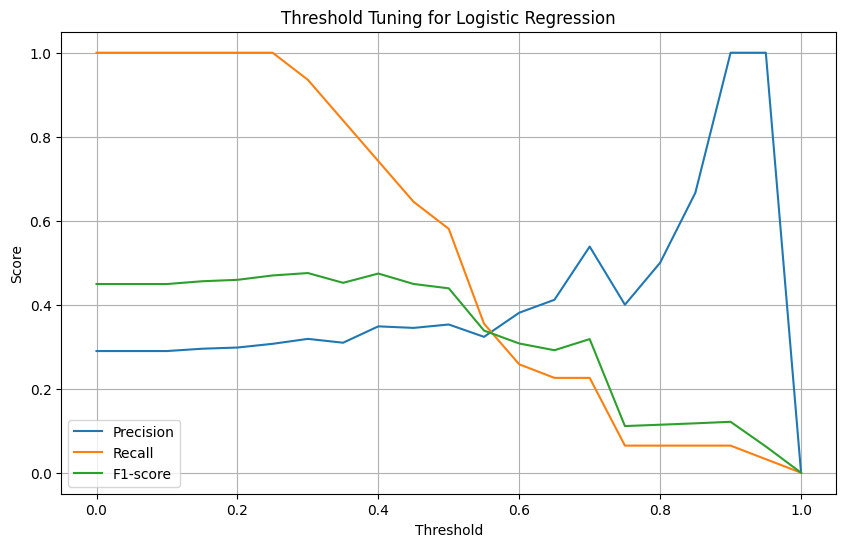

Best Threshold by F1-score: 0.30
Threshold    0.300000
Precision    0.318681
Recall       0.935484
F1           0.475410
Name: 6, dtype: float64


In [143]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score
# Get predicted probabilities from your fitted model
y_proba = clf.predict_proba(X_val)[:, 1]

# Try a range of thresholds
thresholds = np.arange(0.0, 1.01, 0.05)

results = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_val, y_pred_thresh, zero_division=0)
    recall = recall_score(y_val, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_val, y_pred_thresh, zero_division=0)
    results.append((thresh, precision, recall, f1))

# Convert to DataFrame for easy viewing
threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall")
plt.plot(threshold_df["Threshold"], threshold_df["F1"], label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Show best F1-score threshold
best_f1_row = threshold_df.sort_values(by="F1", ascending=False).iloc[0]
print(f"Best Threshold by F1-score: {best_f1_row['Threshold']:.2f}")
print(best_f1_row)

In [144]:
y_final_pred = (y_proba > best_f1_row['Threshold']).astype(int)
roc_auc_score(y_val, y_final_pred)

0.5598471986417657

In [145]:
print(classification_report(y_val, y_final_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.18      0.30        76
         1.0       0.32      0.94      0.48        31

    accuracy                           0.40       107
   macro avg       0.60      0.56      0.39       107
weighted avg       0.71      0.40      0.35       107



With recall = 94% we are prediciting most refunded orders but with precision 32% we have a lot of misclassifications as refunded. This will predict orders that are not refunded as also refunded.

In [146]:
y_proba_train = clf.predict_proba(X_train)[:, 1]
y_final_pred_train = (y_proba_train > best_f1_row['Threshold']).astype(int)
roc_auc_score(y_train, y_final_pred_train)

0.5611781670583209

In [147]:
print(classification_report(y_train, y_final_pred_train))

              precision    recall  f1-score   support

         0.0       0.89      0.18      0.30       302
         1.0       0.32      0.94      0.48       124

    accuracy                           0.40       426
   macro avg       0.60      0.56      0.39       426
weighted avg       0.72      0.40      0.35       426



Feature importance

In [148]:
pd.DataFrame({
    "feature": X.columns,
    "coefficient": clf.coef_[0]
}).sort_values(by="coefficient",  ascending=False)


,feature,coefficient
3,avg_price_per_item,0.472843
6,is_weekend,0.396116
4,order_hour,0.352415
12,num_page_viewed,0.279983
0,total_quantity,0.165862
18,item_id,0.147879
8,num_events_before_order,0.144350
11,num_clicked,0.138859
13,num_product_added_to_cart,0.121784
17,time_from_last_event,0.094125


## Light GBM
https://www.youtube.com/watch?v=9uxWzeLglr0

In [149]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [150]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [151]:
X_train_gbm, X_test_gbm, y_train_gbm, y_test_gbm = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [152]:
X_train_gbm.shape, X_test_gbm.shape, y_train_gbm.shape, y_test_gbm.shape

((340, 19), (86, 19), (340,), (86,))

The below creates a new dataset from the training features and labels. It is a highly optimized data structure used internally by LightGBM. It store data in binary format super fast for training. It can handle missing values, categorical data and feature names.

That reference=dtrain tells LightGBM:

"Use the same binning rules from training for this validation data."

Otherwise, it might create new bins for validation data, which:

Causes inconsistency

Hurts performance or causes errors

In [153]:
dtrain = lgb.Dataset(X_train_gbm, label=y_train_gbm)
dtest = lgb.Dataset(X_test_gbm, label=y_test_gbm, reference=dtrain) # reference makes sure the test set is also similar to train
dtest

In [154]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'scale_pos_weight': 2.0  # helps with class imbalance
}


In [155]:
model = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dtest],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    #early_stopping_rounds=50,
    #verbose_eval=50
)


In [156]:
# Predict probabilities on train and test sets
y_train_pred = model.predict(X_train_gbm)
y_test_pred = model.predict(X_test_gbm)

# Evaluate AUC on train and test sets
print("Train AUC:", roc_auc_score(y_train_gbm, y_train_pred))
print("Test AUC:", roc_auc_score(y_test_gbm, y_test_pred))

# Classification report with threshold 0.4
print("Train classification report:")
print(classification_report(y_train_gbm, (y_train_pred > 0.4).astype(int)))
print("Test classification report:")
print(classification_report(y_test_gbm, (y_test_pred > 0.4).astype(int)))


Train AUC: 1.0
Test AUC: 0.7718032786885246
Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       241
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340

Test classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84        61
         1.0       0.62      0.64      0.63        25

    accuracy                           0.78        86
   macro avg       0.73      0.74      0.74        86
weighted avg       0.78      0.78      0.78        86



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

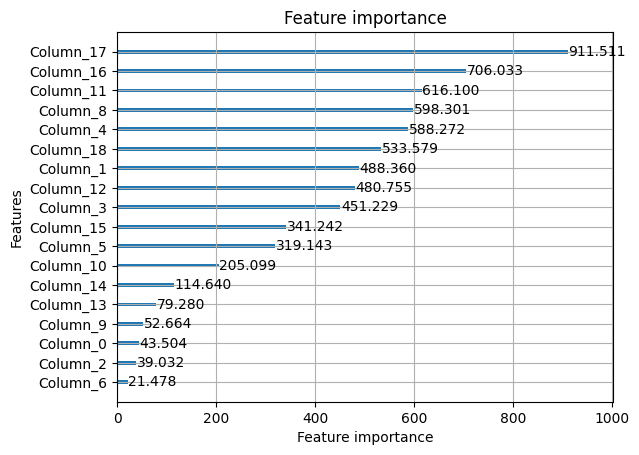

In [157]:
lgb.plot_importance(model, max_num_features=20, importance_type='gain')


Hyperparam tuning

In [158]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 20,
    'max_depth': 4,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 4,
    'verbose': -1,
    'scale_pos_weight': 2.0  # helps with class imbalance
}


In [ ]:
import joblib, os

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

model1 = LGBMClassifier(
    **params,
    n_estimators=300
)

# Define parameter grid for tuning
param_grid = {
    'num_leaves': [15, 20, 31, 50],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'scale_pos_weight': [1.0, 2.0, 5.0]
}

# Use StratifiedKFold for class imbalance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# LGBMClassifier with fixed n_estimators
lgbm = LGBMClassifier(n_estimators=300, **{k: v for k, v in params.items() if k in LGBMClassifier().get_params()})

# Grid search with AUC as scoring
grid = GridSearchCV(
    lgbm,
    param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

model_path = "lgbm_best_model.pkl"

if os.path.exists(model_path):
    model1 = joblib.load(model_path)
    print("Loaded model from lgbm_best_model.pkl")
else:
    grid.fit(X_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best CV AUC:", grid.best_score_)
    model1 = grid.best_estimator_
    joblib.dump(model1, model_path)
    print("Trained and saved new model to lgbm_best_model.pkl")

# Only print best params and score if grid has been fitted
if hasattr(grid, "best_params_"):
    print("Best params:", grid.best_params_)
    print("Best CV AUC:", grid.best_score_)

# Use best estimator for further fitting if needed
if hasattr(grid, "best_estimator_"):
    model1 = grid.best_estimator_
    
model1

Loaded model from lgbm_best_model.pkl


LGBMClassifier(learning_rate=0.03, max_depth=5, n_estimators=300, num_leaves=15,
               objective='binary', scale_pos_weight=2.0)

In [167]:
# Predict probabilities on train and test sets
y_train_pred1 = model1.predict(X_train_gbm)
y_test_pred1 = model1.predict(X_test_gbm)

# Evaluate AUC on train and test sets
print("Train AUC:", roc_auc_score(y_train_gbm, y_train_pred1))
print("Test AUC:", roc_auc_score(y_test_gbm, y_test_pred1))

# Classification report with threshold 0.4
print("Train classification report:")
print(classification_report(y_train_gbm, (y_train_pred1 > 0.4).astype(int)))
print("Test classification report:")
print(classification_report(y_test_gbm, (y_test_pred1 > 0.4).astype(int)))


Train AUC: 0.9887254285594536
Test AUC: 0.9754098360655737
Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       241
         1.0       0.97      0.99      0.98        99

    accuracy                           0.99       340
   macro avg       0.98      0.99      0.99       340
weighted avg       0.99      0.99      0.99       340

Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        61
         1.0       0.89      1.00      0.94        25

    accuracy                           0.97        86
   macro avg       0.95      0.98      0.96        86
weighted avg       0.97      0.97      0.97        86



In [169]:
puffy_data

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,...,num_checkout_started,num_clicked,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,parsed_items,item_id
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0.0,2025-03-02 20:59:53,1,1349.0,1,1349.0,...,4,62,17,7,6,9,9528.248,149.888,"{'item_id': 14014803017762, 'price': 1349, 'qu...",14014803017762
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0.0,2025-03-16 01:34:30,1,1249.0,1,1249.0,...,4,11,10,1,0,4,3196811.749,2.703,"{'item_id': 14075441512482, 'price': 1249, 'qu...",14075441512482
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0.0,2025-03-18 23:24:48,1,1599.0,1,1599.0,...,4,110,21,3,0,7,202610.586,134.428,"{'item_id': 14081515061282, 'price': 1599, 'qu...",14081515061282
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0.0,2025-03-10 00:48:15,1,1249.0,1,1249.0,...,6,41,24,2,1,13,260266.068,2.937,"{'item_id': 14062729363490, 'price': 1249, 'qu...",14062729363490
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0.0,2025-03-22 02:42:08,1,1599.0,1,1599.0,...,2,8,3,1,0,3,554.000,224.401,"{'item_id': 14088320155682, 'price': 1599, 'qu...",14088320155682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1740599950-AUfdH8fC4pNM,2025-03-26 04:10:12,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,"[{""item_id"":14096713580578,""price"":1049,""quant...",NaN,2025-03-26 04:10:12,1,1049.0,1,1049.0,...,2,92,22,3,0,9,2362257.886,2.406,"{'item_id': 14096713580578, 'price': 1049, 'qu...",14096713580578
651,1738335391-OjVW59QwxEcQ,2025-03-26 03:58:16,2e0312465bbc03176c760096819eefed4fbb310a033887...,"[{""item_id"":14096699490338,""price"":3049,""quant...",NaN,2025-03-26 03:58:16,1,3049.0,1,3049.0,...,2,194,31,2,1,21,4626102.807,1.924,"{'item_id': 14096699490338, 'price': 3049, 'qu...",14096699490338
652,1742846616-CEtdrg0Gibln,2025-03-26 01:49:07,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,"[{""item_id"":14096538501154,""price"":1199,""quant...",NaN,2025-03-26 01:49:07,1,1199.0,1,1199.0,...,2,64,10,1,0,4,107128.234,1088.876,"{'item_id': 14096538501154, 'price': 1199, 'qu...",14096538501154
653,1742938106-Sra7MQoek6bw,2025-03-25 21:50:36,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,"[{""item_id"":14096217604130,""price"":1249,""quant...",NaN,2025-03-25 21:50:36,1,1249.0,1,1249.0,...,2,21,8,2,1,7,1324.262,2.598,"{'item_id': 14096217604130, 'price': 1249, 'qu...",14096217604130


In [170]:
# Prepare features for all rows in puffy_data (exclude refunded and unnecessary columns)
drop_cols = ["client_id", "order_id", "line_items", "parsed_items", "order_timestamp", "order_datetime", "refunded"]
X_puffy = puffy_data.drop(columns=drop_cols, errors="ignore")

# Scale using the previously fitted scaler
X_puffy_scaled = scaler.transform(X_puffy)

# Predict probabilities and classes using the best LightGBM model
puffy_pred_proba = model1.predict_proba(X_puffy_scaled)[:, 1]
puffy_pred = (puffy_pred_proba > 0.4).astype(int)

# Attach predictions to the puffy_data dataframe
puffy_data["predicted_refunded"] = puffy_pred
puffy_data["predicted_refunded_proba"] = puffy_pred_proba

puffy_data[["order_id", "predicted_refunded", "predicted_refunded_proba", "refunded"]]

,order_id,predicted_refunded,predicted_refunded_proba,refunded
0,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,0,0.257654,0.0
1,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,0,0.036035,0.0
2,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,1,0.533652,0.0
3,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,0,0.216038,0.0
4,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,0,0.064535,0.0
...,...,...,...,...
650,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,0,0.094357,NaN
651,2e0312465bbc03176c760096819eefed4fbb310a033887...,0,0.396212,NaN
652,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,1,0.567719,NaN
653,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,1,0.498560,NaN


In [173]:
from sklearn.inspection import permutation_importance
import pandas as pd

# model: your trained LGBMClassifier
# X_val, y_val: your validation set

result = permutation_importance(
    model1,                # your trained model
    X_val,              # input features
    y_val,              # target
    n_repeats=10,       # more repeats = more stable
    random_state=42,
    scoring='roc_auc'   # or 'accuracy', 'f1', etc.
)


# Create a DataFrame
perm_df = pd.DataFrame({
    "feature": X.columns,
    "mean_importance": result.importances_mean,
    "std_importance": result.importances_std
}).sort_values(by="mean_importance", ascending=False)

print(perm_df.head(10))


                      feature  mean_importance  std_importance
3          avg_price_per_item         0.064261        0.015885
4                  order_hour         0.058489        0.025243
18                    item_id         0.046562        0.018565
16      time_from_first_event         0.043336        0.013641
17       time_from_last_event         0.042190        0.020431
11                num_clicked         0.034338        0.021036
1           total_price_cents         0.018506        0.006741
2          unique_items_count         0.016511        0.006513
13  num_product_added_to_cart         0.014431        0.006556
15           num_size_changed         0.007895        0.009503


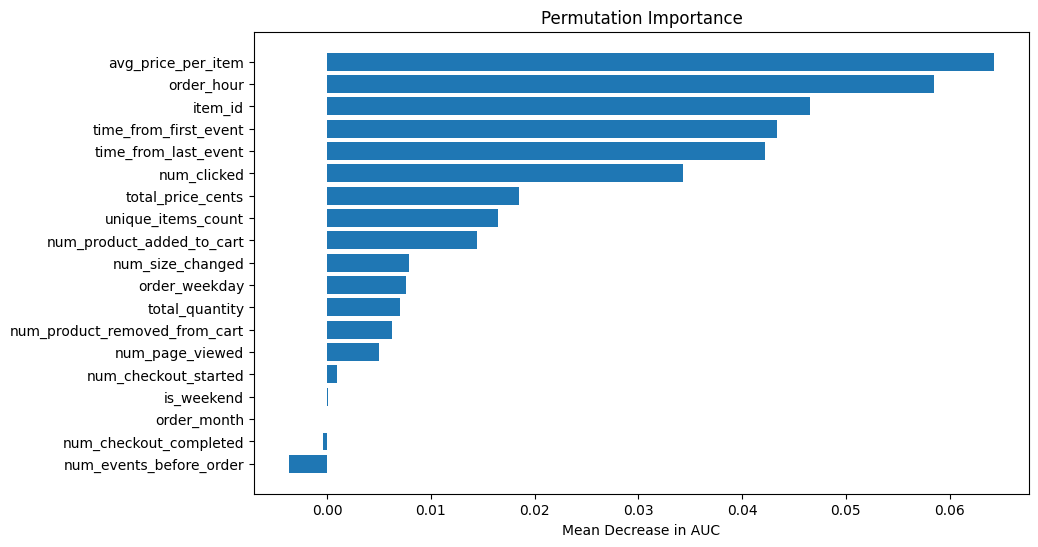

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(perm_df["feature"], perm_df["mean_importance"])
plt.xlabel("Mean Decrease in AUC")
plt.title("Permutation Importance")
plt.gca().invert_yaxis()
plt.show()


In [175]:
puffy_data

,client_id,order_timestamp,order_id,line_items,refunded,order_datetime,total_quantity,total_price_cents,unique_items_count,avg_price_per_item,...,num_page_viewed,num_product_added_to_cart,num_product_removed_from_cart,num_size_changed,time_from_first_event,time_from_last_event,parsed_items,item_id,predicted_refunded,predicted_refunded_proba
0,1740939660-IEBIN8sExE8h,2025-03-02 20:59:53,2264804f47060e9d0f4e3ea8c4375f5a543e671e1e4323...,"[{""item_id"":14014803017762,""price"":1349,""quant...",0.0,2025-03-02 20:59:53,1,1349.0,1,1349.0,...,17,7,6,9,9528.248,149.888,"{'item_id': 14014803017762, 'price': 1349, 'qu...",14014803017762,0,0.257654
1,1738892056-5Pmy-qzbrEp5,2025-03-16 01:34:30,98995a41bed6dfd5c9ecaf53a9f2ec57f66da943956b99...,"[{""item_id"":14075441512482,""price"":1249,""quant...",0.0,2025-03-16 01:34:30,1,1249.0,1,1249.0,...,10,1,0,4,3196811.749,2.703,"{'item_id': 14075441512482, 'price': 1249, 'qu...",14075441512482,0,0.036035
2,1742137675-pAca36iXg3Im,2025-03-18 23:24:48,a6d0cbf4593a4834a4d51013460b25570b51b9e249996b...,"[{""item_id"":14081515061282,""price"":1599,""quant...",0.0,2025-03-18 23:24:48,1,1599.0,1,1599.0,...,21,3,0,7,202610.586,134.428,"{'item_id': 14081515061282, 'price': 1599, 'qu...",14081515061282,1,0.533652
3,1741307426-DHmxXHZnMFN-,2025-03-10 00:48:15,15d361b74f984f1e7b8bbbe13005a5908ee7ae74641863...,"[{""item_id"":14062729363490,""price"":1249,""quant...",0.0,2025-03-10 00:48:15,1,1249.0,1,1249.0,...,24,2,1,13,260266.068,2.937,"{'item_id': 14062729363490, 'price': 1249, 'qu...",14062729363490,0,0.216038
4,1742610768-Ry2N04IIc9LR,2025-03-22 02:42:08,0a3b5b9c86ce3917809c804851a2f1297556bb874cb243...,"[{""item_id"":14088320155682,""price"":1599,""quant...",0.0,2025-03-22 02:42:08,1,1599.0,1,1599.0,...,3,1,0,3,554.000,224.401,"{'item_id': 14088320155682, 'price': 1599, 'qu...",14088320155682,0,0.064535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1740599950-AUfdH8fC4pNM,2025-03-26 04:10:12,6c9e750b3a2f2b132c1c46341d231e6c8ea903a01ed672...,"[{""item_id"":14096713580578,""price"":1049,""quant...",NaN,2025-03-26 04:10:12,1,1049.0,1,1049.0,...,22,3,0,9,2362257.886,2.406,"{'item_id': 14096713580578, 'price': 1049, 'qu...",14096713580578,0,0.094357
651,1738335391-OjVW59QwxEcQ,2025-03-26 03:58:16,2e0312465bbc03176c760096819eefed4fbb310a033887...,"[{""item_id"":14096699490338,""price"":3049,""quant...",NaN,2025-03-26 03:58:16,1,3049.0,1,3049.0,...,31,2,1,21,4626102.807,1.924,"{'item_id': 14096699490338, 'price': 3049, 'qu...",14096699490338,0,0.396212
652,1742846616-CEtdrg0Gibln,2025-03-26 01:49:07,54fc987f1fe4dc449d8321215915582fe326e7778c1f3e...,"[{""item_id"":14096538501154,""price"":1199,""quant...",NaN,2025-03-26 01:49:07,1,1199.0,1,1199.0,...,10,1,0,4,107128.234,1088.876,"{'item_id': 14096538501154, 'price': 1199, 'qu...",14096538501154,1,0.567719
653,1742938106-Sra7MQoek6bw,2025-03-25 21:50:36,74423a5983ffa7564e52c313ddb4304b576577c89a801c...,"[{""item_id"":14096217604130,""price"":1249,""quant...",NaN,2025-03-25 21:50:36,1,1249.0,1,1249.0,...,8,2,1,7,1324.262,2.598,"{'item_id': 14096217604130, 'price': 1249, 'qu...",14096217604130,1,0.498560


In [176]:
sample_submission = puffy_data[puffy_data["refunded"].isnull()][["order_id", "predicted_refunded"]].copy()
sample_submission.rename(columns={"predicted_refunded": "refunded"}, inplace=True)
sample_submission.to_csv("sample_submission.csv", index=False)